In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

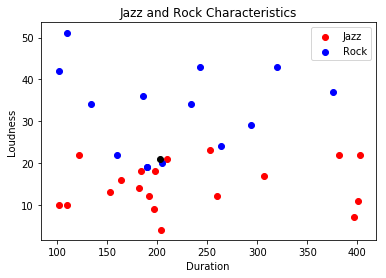

In [95]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102,
                     320, 260, 160]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42,
                     43, 12, 22]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
                  0, 1, 0]

# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)

plt.scatter(203,21,color='black')
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

## My KNN implementation
### I know we're going to iterate on this by refining how we deal with distance.

In [158]:

def nearest_k(coord, k, data, target):
    """
    Calculates and returns distances for nearest k points from coord, along with type
    
    IN: a cartesian coordinate, the number of neighbors to consider, current points, classifications
    OUT: a sorted list of size k with distances to nearest neighbors and their classification
    """
    distances = []
    
    # because of the Numpy array cast, this becomes an array based on the shape of data,
    # which is an array of 2-element lists, each holding a pair of coordinates
    points_sqrd = ((coord - np.array(data))**2)
    for idx, elem in enumerate(points_sqrd):
        
        # sum and take the square root, which is the distance, and get appropriate 'vote'
        distances.append([np.sqrt(elem[0] + elem[1]), target[idx]])
        
    # this gives the nearest distances in order, of the requested size
    return sorted(distances)[:k]


def pred_type(coord, k, data, target):
    """
    Predicts incoming coordinate's type based on the types of its neighbors.
    
    IN: a cartesian coordinate, the number of neighbors to consider, current points, classifications
    OUT: prints the ratios of votes of k neighbors and the classification based on those votes
    """
    k_neighbors = np.array(nearest_k(coord, k, data, target))
    
    # easier to do here than inside my print; total the 1's
    ones = int(k_neighbors[:,1].sum())
    print("Aaron's implementation:")
    print(f"Jazz (1) gets {ones}/{k} -- [{ones/k:.4f}]\nRock (0) gets {k-ones}/{k} -- [{(k-ones)/k:.4f}]")


### Called at the bottom of next cell, after sklearn's implementation is called

In [159]:
from sklearn.neighbors import KNeighborsClassifier

k = 8
neighbors = KNeighborsClassifier(n_neighbors=k)
X = music[['loudness', 'duration']]     # note that these are reversed, coming in Y, X order
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
xy = [5, 301]
print(f"predicting (rock 0, jazz 1): {neighbors.predict([xy])[0]}")
print(f"probabilities (rock to jazz): {neighbors.predict_proba([xy])[0]}\n")

pred_type(xy, k, X, Y)

predicting (rock 0, jazz 1): 0
probabilities (rock to jazz): [0.625 0.375]

Aaron's implementation:
Jazz (1) gets 3/8 -- [0.3750]
Rock (0) gets 5/8 -- [0.6250]


[18 34 43 36 22  9 29 22 10 24 20 10 17 51  7 13 19 12 21 22 16 18  4 23
 34 19 14 11 37 42 43 12 22]


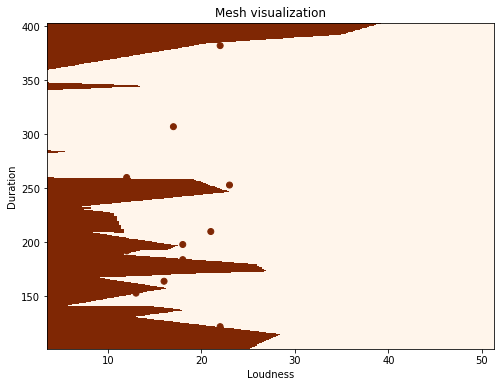

In [66]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 0.25

# the X[:, 0] notation is just taking all rows in the array (which is a list of lists, each containing one of
# the points), and only the first element 0, or Loudness in this case, then 1 or Duration

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

# I think this is creating literally a huge grid of points, stepsize of h; xx and yy are long lists of
# basically coordinates, and match with each other.
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# now, for every point on the grid created above, we compute using our model. So, the more neighbors
# passed in or smaller mesh, the longer the calculations.  Every single point in the mesh has to 
# calculate for all n neighbors
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# reshape() returns an array with same data in the new shape.  In this case, we're making Z match the 
# shape of xx and yy, so they can be plotted
# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))           # I think '1' is redundant here, it works without
plt.set_cmap(plt.cm.Oranges)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()